In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import requests
import io
import time

In [2]:
def download_and_read_data():
    """
    Tải và đọc dữ liệu mạng các trang Facebook về thực phẩm
    Returns:
        DataFrame: Chứa các cạnh của đồ thị
    """
    print("Đang tải dữ liệu Facebook Food Pages Network...")

    # URL của dataset
    url = "https://nrvis.com/download/data/soc/fb-pages-food.zip"

    try:
        # Tải dữ liệu
        response = requests.get(url)
        if response.status_code == 200:
            # Đọc file zip
            z = zipfile.ZipFile(io.BytesIO(response.content))

            # Đọc dữ liệu từ file trong zip
            df = pd.read_csv(z.open('fb-pages-food.edges'),
                           sep=' ',
                           names=['source', 'target'])
            return df
        else:
            raise Exception("Không thể tải dữ liệu")
    except Exception as e:
        print(f"Lỗi khi tải dữ liệu: {e}")
        return None

In [3]:
def analyze_network(G):
    """
    Phân tích đặc trưng của mạng các trang Facebook
    Args:
        G: Đồ thị NetworkX
    Returns:
        dict: Các số đo của mạng
    """
    metrics = {}

    # 1. Thông tin cơ bản
    print("\nĐang tính toán thông tin cơ bản...")
    metrics['nodes'] = G.number_of_nodes()  # Số lượng trang
    metrics['edges'] = G.number_of_edges()  # Số lượng liên kết
    metrics['density'] = nx.density(G)      # Mật độ liên kết

    # 2. Degree Analysis
    print("Đang tính toán degree metrics...")
    start_time = time.time()
    degrees = dict(G.degree())
    metrics['avg_degree'] = np.mean(list(degrees.values()))
    metrics['max_degree'] = max(degrees.values())
    metrics['degrees'] = degrees
    print(f"Thời gian tính Degree metrics: {time.time() - start_time:.2f}s")

    # 3. Degree Centrality
    print("Đang tính toán Degree Centrality...")
    start_time = time.time()
    dc = nx.degree_centrality(G)
    metrics['degree_centrality'] = {
        'values': dc,
        'max': max(dc.values()),
        'avg': sum(dc.values()) / len(dc),
        'top_pages': sorted(dc.items(), key=lambda x: x[1], reverse=True)[:10]
    }
    print(f"Thời gian tính Degree Centrality: {time.time() - start_time:.2f}s")

    # 4. Betweenness Centrality
    print("Đang tính toán Betweenness Centrality...")
    start_time = time.time()
    bc = nx.betweenness_centrality(G)
    metrics['betweenness_centrality'] = {
        'values': bc,
        'max': max(bc.values()),
        'avg': sum(bc.values()) / len(bc),
        'top_pages': sorted(bc.items(), key=lambda x: x[1], reverse=True)[:10]
    }
    print(f"Thời gian tính Betweenness Centrality: {time.time() - start_time:.2f}s")

    # 5. Closeness Centrality
    print("Đang tính toán Closeness Centrality...")
    start_time = time.time()
    cc = nx.closeness_centrality(G)
    metrics['closeness_centrality'] = {
        'values': cc,
        'max': max(cc.values()),
        'avg': sum(cc.values()) / len(cc),
        'top_pages': sorted(cc.items(), key=lambda x: x[1], reverse=True)[:10]
    }
    print(f"Thời gian tính Closeness Centrality: {time.time() - start_time:.2f}s")

    # 6. PageRank
    print("Đang tính toán PageRank...")
    start_time = time.time()
    pr = nx.pagerank(G, alpha=0.85)
    metrics['pagerank'] = {
        'values': pr,
        'max': max(pr.values()),
        'avg': sum(pr.values()) / len(pr),
        'top_pages': sorted(pr.items(), key=lambda x: x[1], reverse=True)[:10]
    }
    print(f"Thời gian tính PageRank: {time.time() - start_time:.2f}s")

    return metrics

In [4]:
def print_results(metrics):
    """
    In kết quả phân tích
    """
    print("\nKẾT QUẢ PHÂN TÍCH MẠNG FACEBOOK FOOD PAGES")
    print("=" * 50)

    print("\n1. THÔNG TIN CƠ BẢN")
    print("-" * 30)
    print(f"Số lượng trang: {metrics['nodes']:,}")
    print(f"Số lượng liên kết: {metrics['edges']:,}")
    print(f"Mật độ mạng: {metrics['density']:.6f}")
    print(f"Số liên kết trung bình/trang: {metrics['avg_degree']:.2f}")
    print(f"Số liên kết nhiều nhất: {metrics['max_degree']}")

    print("\n2. PHÂN TÍCH CENTRALITY")
    centrality_measures = {
        'Degree Centrality': 'degree_centrality',
        'Betweenness Centrality': 'betweenness_centrality',
        'Closeness Centrality': 'closeness_centrality',
        'PageRank': 'pagerank'
    }

    for name, measure in centrality_measures.items():
        print(f"\n{name}:")
        print(f"- Giá trị trung bình: {metrics[measure]['avg']:.6f}")
        print(f"- Giá trị lớn nhất: {metrics[measure]['max']:.6f}")
        print("\nTop 5 trang có giá trị cao nhất:")
        for page, score in metrics[measure]['top_pages'][:5]:
            print(f"Page {page}: {score:.6f}")


In [8]:
def visualize_metrics(G, metrics):
    """
    Trực quan hóa các số đo của đồ thị mạng Facebook Food Pages.
    Args:
        G: Đồ thị NetworkX.
        metrics: Dictionary chứa các số đo của đồ thị.
    """
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    # 1. Degree Distribution
    ax = axs[0, 0]
    degree_values = list(metrics['degrees'].values())
    ax.hist(degree_values, bins=50, color='skyblue', edgecolor='black')
    ax.set_title('Degree Distribution')
    ax.set_xlabel('Degree')
    ax.set_ylabel('Frequency')

    # 2. Centrality Comparison (Boxplot)
    ax = axs[0, 1]
    centrality_measures = ['degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'pagerank']
    centrality_values = [
        list(metrics['degree_centrality']['values'].values()),
        list(metrics['betweenness_centrality']['values'].values()),
        list(metrics['closeness_centrality']['values'].values()),
        list(metrics['pagerank']['values'].values())
    ]
    
    ax.boxplot(centrality_values, labels=['Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'PageRank'])
    ax.set_title('Centrality Comparison')
    ax.set_ylabel('Centrality Value')

    # 3. Top Pages Comparison (Bar Chart)
    ax = axs[1, 0]
    top_n = 10
    top_degree_nodes = sorted(metrics['degree_centrality']['top_pages'], key=lambda x: x[1], reverse=True)[:top_n]
    top_dc_nodes = sorted(metrics['degree_centrality']['top_pages'], key=lambda x: x[1], reverse=True)[:top_n]
    top_bc_nodes = sorted(metrics['betweenness_centrality']['top_pages'], key=lambda x: x[1], reverse=True)[:top_n]
    top_cc_nodes = sorted(metrics['closeness_centrality']['top_pages'], key=lambda x: x[1], reverse=True)[:top_n]
    top_pr_nodes = sorted(metrics['pagerank']['top_pages'], key=lambda x: x[1], reverse=True)[:top_n]

    top_nodes = {
        'Degree': [x[0] for x in top_degree_nodes],
        'Degree Centrality': [x[0] for x in top_dc_nodes],
        'Betweenness Centrality': [x[0] for x in top_bc_nodes],
        'Closeness Centrality': [x[0] for x in top_cc_nodes],
        'PageRank': [x[0] for x in top_pr_nodes]
    }

    top_values = {
        'Degree': [x[1] for x in top_degree_nodes],
        'Degree Centrality': [x[1] for x in top_dc_nodes],
        'Betweenness Centrality': [x[1] for x in top_bc_nodes],
        'Closeness Centrality': [x[1] for x in top_cc_nodes],
        'PageRank': [x[1] for x in top_pr_nodes]
    }

    bar_width = 0.15
    index = np.arange(top_n)

    ax.bar(index, top_values['Degree'], bar_width, label='Degree', color='skyblue')
    ax.bar(index + bar_width, top_values['Degree Centrality'], bar_width, label='Degree Centrality', color='lightgreen')
    ax.bar(index + 2*bar_width, top_values['Betweenness Centrality'], bar_width, label='Betweenness Centrality', color='salmon')
    ax.bar(index + 3*bar_width, top_values['Closeness Centrality'], bar_width, label='Closeness Centrality', color='orange')
    ax.bar(index + 4*bar_width, top_values['PageRank'], bar_width, label='PageRank', color='purple')

    ax.set_title('Top Pages Comparison')
    ax.set_xlabel('Pages')
    ax.set_ylabel('Centrality Value')
    ax.set_xticks(index + 2*bar_width)
    ax.set_xticklabels(top_nodes['Degree'])
    ax.legend()

    # 4. Degree vs Centrality (Scatter Plot)
    ax = axs[1, 1]
    degree_centrality_values = list(metrics['degree_centrality']['values'].values())
    betweenness_centrality_values = list(metrics['betweenness_centrality']['values'].values())
    closeness_centrality_values = list(metrics['closeness_centrality']['values'].values())
    pagerank_values = list(metrics['pagerank']['values'].values())

    ax.scatter(degree_values, degree_centrality_values, label='Degree vs Degree Centrality', alpha=0.5, color='blue')
    ax.scatter(degree_values, betweenness_centrality_values, label='Degree vs Betweenness Centrality', alpha=0.5, color='red')
    ax.scatter(degree_values, closeness_centrality_values, label='Degree vs Closeness Centrality', alpha=0.5, color='green')
    ax.scatter(degree_values, pagerank_values, label='Degree vs PageRank', alpha=0.5, color='purple')

    ax.set_title('Degree vs Centrality Comparison')
    ax.set_xlabel('Degree')
    ax.set_ylabel('Centrality Value')
    ax.legend()

    plt.tight_layout()
    plt.show()

In [5]:
# Tải dữ liệu
edges_df = download_and_read_data()

# Tạo đồ thị có hướng
print("Đang tạo đồ thị...")
G = nx.from_pandas_edgelist(edges_df, 'source', 'target', create_using=nx.DiGraph())

Đang tải dữ liệu Facebook Food Pages Network...
Đang tạo đồ thị...


In [6]:
# Phân tích mạng
metrics = analyze_network(G)


Đang tính toán thông tin cơ bản...
Đang tính toán degree metrics...
Thời gian tính Degree metrics: 0.01s
Đang tính toán Degree Centrality...
Thời gian tính Degree Centrality: 0.00s
Đang tính toán Betweenness Centrality...
Thời gian tính Betweenness Centrality: 13.23s
Đang tính toán Closeness Centrality...
Thời gian tính Closeness Centrality: 0.03s
Đang tính toán PageRank...
Thời gian tính PageRank: 0.20s


In [7]:
# In kết quả
print_results(metrics)


KẾT QUẢ PHÂN TÍCH MẠNG FACEBOOK FOOD PAGES

1. THÔNG TIN CƠ BẢN
------------------------------
Số lượng trang: 4,204
Số lượng liên kết: 2,102
Mật độ mạng: 0.000119
Số liên kết trung bình/trang: 1.00
Số liên kết nhiều nhất: 1

2. PHÂN TÍCH CENTRALITY

Degree Centrality:
- Giá trị trung bình: 0.000238
- Giá trị lớn nhất: 0.000238

Top 5 trang có giá trị cao nhất:
Page 0,276: 0.000238
Page nan: 0.000238
Page 0,58: 0.000238
Page nan: 0.000238
Page 0,132: 0.000238

Betweenness Centrality:
- Giá trị trung bình: 0.000000
- Giá trị lớn nhất: 0.000000

Top 5 trang có giá trị cao nhất:
Page 0,276: 0.000000
Page nan: 0.000000
Page 0,58: 0.000000
Page nan: 0.000000
Page 0,132: 0.000000

Closeness Centrality:
- Giá trị trung bình: 0.000119
- Giá trị lớn nhất: 0.000238

Top 5 trang có giá trị cao nhất:
Page nan: 0.000238
Page nan: 0.000238
Page nan: 0.000238
Page nan: 0.000238
Page nan: 0.000238

PageRank:
- Giá trị trung bình: 0.000238
- Giá trị lớn nhất: 0.000309

Top 5 trang có giá trị cao nhất:

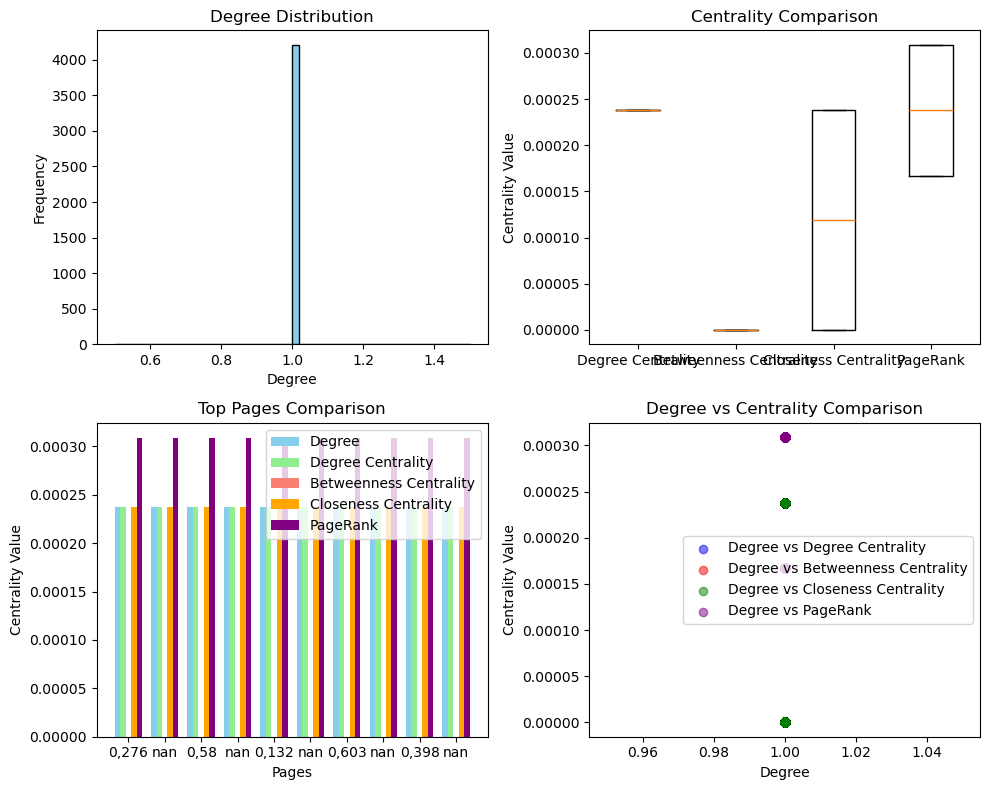

In [9]:
visualize_metrics(G, metrics)